In [1]:
%matplotlib inline

In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame
import csv
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# machine learning
import xgboost as xgb

In [ ]:
#print(open('../../../../../../root/all.csv').read())
CD_df  = pd.read_csv("../../../../../home/jpati/all.csv", dtype={'AUTHORIZED_CAPITAL': str,'PAIDUP_CAPITAL': str})
#CD_df.replace(['NA'], [0])
CD_df.loc[CD_df['COMPANY_CLASS'] == 'OPC', 'COMPANY_CLASS'] = 'One Person Company'
CD_df.loc[CD_df['COMPANY_CLASS'] == 'PRIV', 'COMPANY_CLASS'] = 'Private'
CD_df.loc[CD_df['COMPANY_CLASS'] == 'PUBC', 'COMPANY_CLASS'] = 'Public'
CD_df.AUTHORIZED_CAPITAL = CD_df.AUTHORIZED_CAPITAL.str.replace(',', '').astype(float)
CD_df.PAIDUP_CAPITAL = CD_df.PAIDUP_CAPITAL.str.replace(',', '').astype(float)
CD_df = CD_df[CD_df.columns[0:13]]
CD_df.tail()

In [4]:
CD1 = CD_df.groupby( [ "REGISTERED_STATE" ])
PC = CD1[["PAIDUP_CAPITAL"]].sum()
AC = CD1[["AUTHORIZED_CAPITAL"]].sum()

In [5]:
PC_df = DataFrame({'REGISTERED_STATE':PC.index,
                      'PAIDUP_CAPITAL':PC.PAIDUP_CAPITAL,
                          'AUTHORIZED_CAPITAL':AC.AUTHORIZED_CAPITAL}, 
                      columns=['REGISTERED_STATE', 'PAIDUP_CAPITAL', 'AUTHORIZED_CAPITAL'])
PC_df.head()

,REGISTERED_STATE,PAIDUP_CAPITAL,AUTHORIZED_CAPITAL
REGISTERED_STATE,,,
Andaman and Nicobar Islands,Andaman and Nicobar Islands,15630400,28500000
Andhra Pradesh,Andhra Pradesh,500000,30002300000
Arunachal Pradesh,Arunachal Pradesh,52505360,104900000
Assam,Assam,14308000,14600000
Bihar,Bihar,6089000,8050000


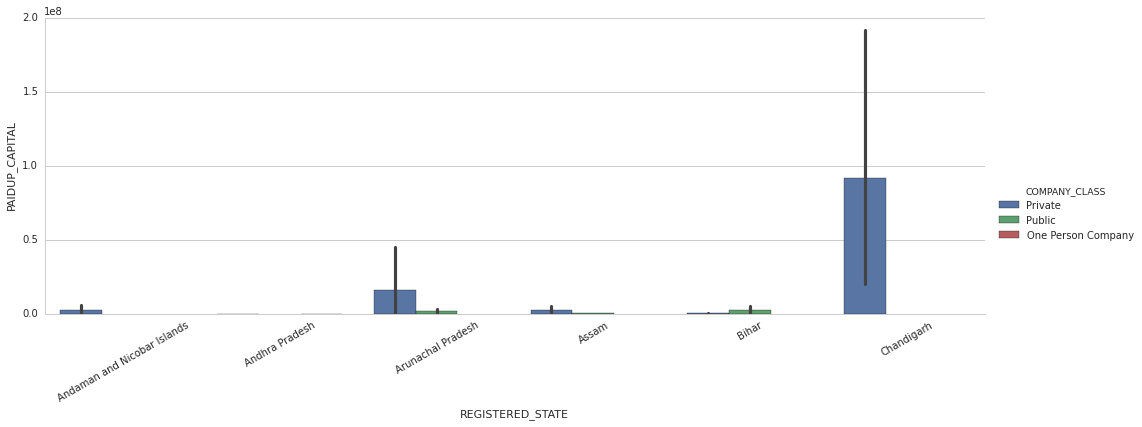

In [6]:
#fig, (axis1) = plt.subplots(1,figsize=(15,4))
#axis1.set_title('State-wise Paid Up Capital for each Company Class')
#axis1.set_ylabel("PAIDUP_CAPITAL")
#sns.barplot(x='REGISTERED_STATE', y='PAIDUP_CAPITAL', hue='COMPANY_CLASS', data=CD_df)
g = sns.factorplot(x='REGISTERED_STATE', y='PAIDUP_CAPITAL', hue='COMPANY_CLASS', data=CD_df,kind='bar',size=5, aspect=2.8)
g.set_xticklabels(rotation=30)

In [ ]:
#fig, (axis1) = plt.subplots(1,figsize=(15,4))
#sns.barplot(x='REGISTERED_STATE', y='AUTHORIZED_CAPITAL', hue='COMPANY_CLASS', data=CD_df)
sns.factorplot(x='REGISTERED_STATE', y='AUTHORIZED_CAPITAL', hue='COMPANY_CLASS', data=CD_df,kind='bar',size=5, aspect=2.8)

In [ ]:
state = raw_input('Enter a state:')
#CD2 = CD_df.groupby( [ "REGISTERED_STATE" , "PRINCIPAL_BUSINESS_ACTIVITY"])
#CD2 = CD_df.groupby( [ "REGISTERED_STATE" ])
x = CD1.get_group(state)
y = x.groupby(["PRINCIPAL_BUSINESS_ACTIVITY"])
#Ind = CD2[["COMPANY_NAME"]].count()
Ind = y[["COMPANY_NAME"]].count()

#Make Pie Chart
print('For ' + state + ' State-wise Paid Up Capital for each Company Class')


# Data to plot
labels = y
sizes = y[["COMPANY_NAME"]].count()

# Plot
plt.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [ ]:
#highest paid up capital and authorised capital per state - simple barplot

MPC = CD1[["PAIDUP_CAPITAL"]].max()
MPC_df = DataFrame({'REGISTERED_STATE':MPC.index,
                      'MAX_Value':MPC.PAIDUP_CAPITAL, 'Category':'PAIDUP CAPITAL'}, 
                      columns=['REGISTERED_STATE', 'MAX_Value', 'Category'])

MAC = CD1[["AUTHORIZED_CAPITAL"]].max()
MAC_df = DataFrame({'REGISTERED_STATE':MAC.index,
                      'MAX_Value':MAC.AUTHORIZED_CAPITAL, 'Category':'AUTHORIZED CAPITAL'}, 
                      columns=['REGISTERED_STATE', 'MAX_Value', 'Category'])

frames = [MPC_df, MAC_df]
result = pd.concat(frames)
result_df = DataFrame({'REGISTERED_STATE':result.index,
                      'MAX Value':result.MAX_Value, 'Category':result.Category}, 
                      columns=['REGISTERED_STATE', 'MAX Value', 'Category'])
result_df

In [ ]:
#fig, (axis1) = plt.subplots(1,figsize=(15,4))
#axis1.set_title('State-wise Paid Up Capital for each Company Class')
#axis1.set_ylabel("PAIDUP_CAPITAL")
sns.factorplot(x='REGISTERED_STATE', y='MAX Value', hue='Category', data=result_df,kind='bar',size=5, aspect=2.8)
#sns.barplot(x='REGISTERED_STATE', y='MAX Value', hue='Category', data=result_df)

In [ ]:
#highest paid up capital and authorised capital per industry - simple barplot
Raw_ByCategory_DF = CD_df.groupby( [ "PRINCIPAL_BUSINESS_ACTIVITY" ])
#CD_df.groupby('PRINCIPAL_BUSINESS_ACTIVITY')['PAIDUP_CAPITAL'].agg(np.max)
MPC = Raw_ByCategory_DF[["PAIDUP_CAPITAL"]].max()
MPC_df = DataFrame({'PRINCIPAL_BUSINESS_ACTIVITY':MPC.index,
                      'MAX_Value':MPC.PAIDUP_CAPITAL, 'Category':'PAIDUP CAPITAL'}, 
                      columns=['PRINCIPAL_BUSINESS_ACTIVITY', 'MAX_Value', 'Category'])

MAC = Raw_ByCategory_DF[["AUTHORIZED_CAPITAL"]].max()
MAC_df = DataFrame({'PRINCIPAL_BUSINESS_ACTIVITY':MAC.index,
                      'MAX_Value':MAC.AUTHORIZED_CAPITAL, 'Category':'AUTHORIZED CAPITAL'}, 
                      columns=['PRINCIPAL_BUSINESS_ACTIVITY', 'MAX_Value', 'Category'])

frames = [MPC_df, MAC_df]
result = pd.concat(frames)
result_df = DataFrame({'PRINCIPAL_BUSINESS_ACTIVITY':result.index,
                      'MAX Value':result.MAX_Value, 'Category':result.Category}, 
                      columns=['PRINCIPAL_BUSINESS_ACTIVITY', 'MAX Value', 'Category'])
#fig, (axis1) = plt.subplots(1,figsize=(15,4))
sns.factorplot(x='PRINCIPAL_BUSINESS_ACTIVITY', y='MAX Value', hue='Category', data=result_df,kind='bar',size=5, aspect=2.8)

In [ ]:
#Count of private and public companies for each state - simple barplot
sns.factorplot(x='REGISTERED_STATE', hue='COMPANY_CLASS', data=CD_df,kind='count',size=5, aspect=2.8)

In [ ]:
#Count of private and public ACTIVE companies for each state - simple barplot
activeOnly = CD_df[CD_df.COMPANY_STATUS == 'ACTIVE']
sns.factorplot(x='REGISTERED_STATE', hue='COMPANY_CLASS', data=activeOnly,kind='count',size=5, aspect=2.8)

In [ ]:
#Count of private and public companies for each industry - simple barplot
sns.factorplot(x='PRINCIPAL_BUSINESS_ACTIVITY', hue='COMPANY_CLASS', data=CD_df,kind='count',size=5, aspect=2.8)

In [ ]:
#Count of private and public ACTIVE companies for each industry - simple barplot
sns.factorplot(x='PRINCIPAL_BUSINESS_ACTIVITY', hue='COMPANY_CLASS', data=activeOnly,kind='count',size=5, aspect=2.8)